<a href="https://colab.research.google.com/github/docinit/geekbrains_python/blob/Python_lesson8/Lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Задание 1
* Импортируйте библиотеки pandas, numpy и matplotlib.
*Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
*Создайте датафреймы X и y из этих данных.
*Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
* Масштабируйте данные с помощью StandardScaler.
* Постройте модель TSNE на тренировочный данных с параметрами:
  * n_components=2, learning_rate=250, random_state=42.
* Постройте диаграмму рассеяния на этих данных.


In [0]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [0]:
X,y = load_boston(return_X_y=True)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [0]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)
print(f'До применения алгоритма TSNE {x_train_scaled.shape}')
print(f'После применения алгоритма TSNE {x_train_tsne.shape}')

До применения алгоритма TSNE (404, 13)
После применения алгоритма TSNE (404, 2)


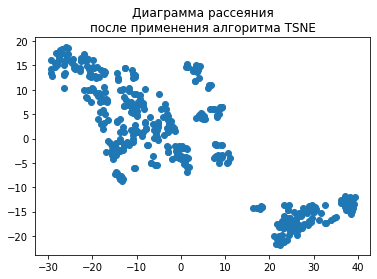

In [6]:
plt.scatter(x_train_tsne[:,0],x_train_tsne[:,1])
plt.title('Диаграмма рассеяния\nпосле применения алгоритма TSNE')
plt.show()

#### Задание 2
* С помощью KMeans разбейте данные из тренировочного набора на 3 кластера используйте все признаки из датафрейма X_train.
* Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
* Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
* Вычислите средние значения price и CRIM в разных кластерах.


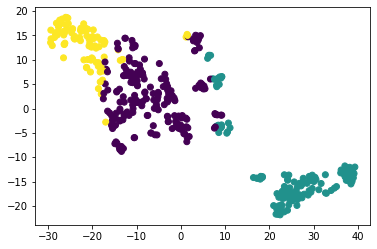

In [7]:
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)

labels_train = kmeans.fit_predict(x_train_scaled)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

plt.show()

#### Средний CRIM для тренировочной выборки

In [8]:
crim_0 = pd.DataFrame(x_train[labels_train == 0],columns = load_boston().feature_names).loc[:,'CRIM'].mean()
print(f'Средний показатель CRIM для кластера 0 = {round(crim_0,2)}')

Средний показатель CRIM для кластера 0 = 0.42


In [9]:
crim_1 = pd.DataFrame(x_train[labels_train == 1],columns = load_boston().feature_names).loc[:,'CRIM'].mean()
print(f'Средний показатель CRIM для кластера 1 = {round(crim_1,2)}')

Средний показатель CRIM для кластера 1 = 10.8


In [10]:
crim_2 = pd.DataFrame(x_train[labels_train == 2],columns = load_boston().feature_names).loc[:,'CRIM'].mean()
print(f'Средний показатель CRIM для кластера 2 = {round(crim_2,2)}')

Средний показатель CRIM для кластера 2 = 0.07


#### Средние цены для тренировочной выборки

In [11]:
price_0 = y_train[labels_train == 0].mean()
print(f'Средняя цена для кластера 0 = {round(price_0,2)}')

Средняя цена для кластера 0 = 24.96


In [12]:
price_1 = y_train[labels_train == 1].mean()
print(f'Средняя цена для кластера 1 = {round(price_1,2)}')

Средняя цена для кластера 1 = 16.17


In [13]:
price_2 = y_train[labels_train == 2].mean()
print(f'Средняя цена для кластера 2 = {round(price_2,2)}')

Средняя цена для кластера 2 = 27.79


#### * Задание 3
* Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
* Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [0]:
labels_test = kmeans.predict(x_test_scaled)

#### Средний CRIM для тестовой выборки

In [15]:
crim_0_test = pd.DataFrame(x_test[labels_test == 0],columns = load_boston().feature_names).loc[:,'CRIM'].mean()
print(f'Средний показатель CRIM для кластера 0 = {round(crim_0_test,2)}')

Средний показатель CRIM для кластера 0 = 0.27


In [16]:
crim_1_test = pd.DataFrame(x_test[labels_test == 1],columns = load_boston().feature_names).loc[:,'CRIM'].mean()
print(f'Средний показатель CRIM для кластера 1 = {round(crim_1_test,2)}')

Средний показатель CRIM для кластера 1 = 10.17


In [17]:
crim_2_test = pd.DataFrame(x_test[labels_test == 2],columns = load_boston().feature_names).loc[:,'CRIM'].mean()
print(f'Средний показатель CRIM для кластера 2 = {round(crim_2_test,2)}')

Средний показатель CRIM для кластера 2 = 0.06


#### Средние цены для тестовой выборки

In [18]:
price_0_test = y_test[labels_test == 0].mean()
print(f'Средняя цена для кластера 0 = {round(price_0_test,2)}')

Средняя цена для кластера 0 = 21.86


In [19]:
price_1_test = y_test[labels_test == 1].mean()
print(f'Средняя цена для кластера 1 = {round(price_1_test,2)}')

Средняя цена для кластера 1 = 16.44


In [20]:
price_2_test = y_test[labels_test == 2].mean()
print(f'Средняя цена для кластера 2 = {round(price_2_test,2)}')

Средняя цена для кластера 2 = 31.35
